## Machine Learning
### Mixture distributions
A mixture distribution is a probabilistic model in which we assume our data points come from a finite number of individual distributions (also called mixture components). To generate data points for a mixture distribution, we use the following two steps one after the other:
- First, select randomly one of the mixture components based on the given probability weights (called mixture weights).
- Then, draw a sample (a data point) from the selected component.

In the following, we use the Gaussian distributions in a mixture distribution. The data points of the Gaussian mixture distribution are then generated.
<br>**Reminder:** We have seen in previous posts that each Gaussian (normal) distribution is represented by its mean vector, and covariance matrix. In the last post, we also displayed the ellipse of the covariance matrix of the normal distributions. In this post, we also display the ellipses of the covariance matrices.
<br>
<Br>https://github.com/ostad-ai/Machine-Learning
<br>Explanation: https://www.pinterest.com/HamedShahHosseini/Machine-Learning/background-knowledge

In [1]:
# importing the required modules
from matplotlib import pyplot as plt
import numpy as np
from numpy.linalg import eig

In [2]:
# example: in this cell we take N samples from the mixture distribution
K=3 # number of components (Gaussians)
N=1000 #number of samples
means=[[1,2],[7,4],[9,0]]
sigmas=[[[2,2],[2,7]],[[5,3],[3,2]],[[2,-2],[-2,4]]]
phis=[.4,.3,.3]  # the sum must be 1
# N samples taken from a mixture of K normal (Gaussian) distributions
colors=['red','blue','green']
xs=[]; cluster=[]
for i in range(N):
        z=np.random.choice(list(range(K)),p=phis)
        cluster.append(colors[z])
        xs.append(np.random.multivariate_normal(means[z],sigmas[z]))
xs=np.asarray(xs)
# each sample is a row vector in xs
# the cluster to which each sample belongs to is held in cluster

In [3]:
# the function to get the points of the ellipse of covariance
def ellipse_covariance(mean,sigma,Npoints=100):
    ts = np.linspace(0, 2*np.pi, Npoints);
    eigvals,eigvecs=eig(sigma)
    points = (np.sqrt(eigvals[np.newaxis,:]) * eigvecs) @ [np.cos(ts), np.sin(ts)]
    return points[0]+mean[0],points[1]+mean[1]

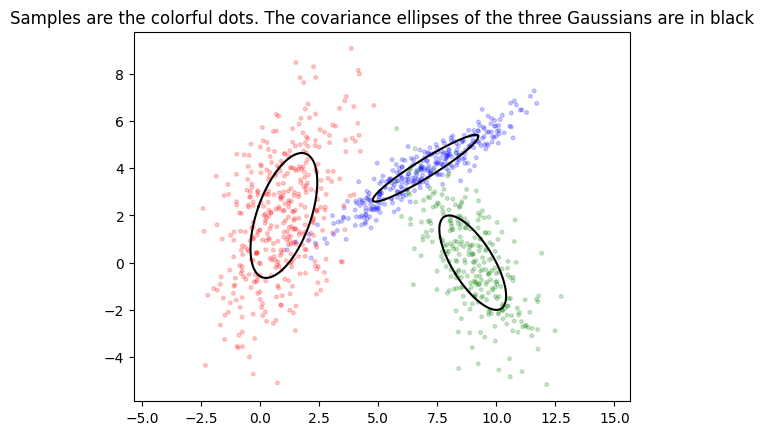

In [4]:
# showing the samples along the ellipses of the covariance of the Gaussians
for mean,sigma in zip(means,sigmas):
    points=ellipse_covariance(mean,sigma)
    plt.plot(points[0],points[1],c='black')
plt.scatter(xs[:,0],xs[:,1],s=7,alpha=.2,c=cluster)
plt.title('Samples are the colorful dots. The covariance ellipses of the three Gaussians are in black')
plt.axis('equal')
plt.show()